In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../input/bri-data-hackathon-cr-optimization/train.csv')
df['periode'] = pd.to_datetime(df['periode'])
df = df.set_index('periode')

print(df.iloc[:3, :3])
print()
print(df.iloc[-3:, :3])

            cash_in_echannel  cash_out_echannel  cash_in_kantor
periode                                                        
2019-07-31      7.303000e+08      -1.304400e+09    1.436722e+11
2019-08-01      7.322000e+08      -8.321500e+08    3.144131e+11
2019-08-02      1.169800e+09      -6.214000e+08    1.251294e+09

            cash_in_echannel  cash_out_echannel  cash_in_kantor
periode                                                        
2020-09-28      7.438000e+08       -556200000.0    1.264345e+11
2020-09-29      1.009250e+09       -772100000.0    1.548627e+11
2020-09-30      6.861000e+08       -833250000.0    1.487817e+11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 425 entries, 2019-07-31 to 2020-09-30
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cash_in_echannel            425 non-null    float64
 1   cash_out_echannel           425 non-null    float64
 2   cash_in_kantor              425 non-null    float64
 3   cash_out_kantor             425 non-null    float64
 4   cr_ketetapan_total_bkn_sum  425 non-null    float64
 5   giro                        425 non-null    float64
 6   deposito                    425 non-null    float64
 7   kewajiban_lain              425 non-null    float64
 8   tabungan                    425 non-null    float64
 9   rata_dpk_mingguan           425 non-null    float64
 10  kas_kantor                  425 non-null    float64
 11  kas_echannel                425 non-null    float64
dtypes: float64(12)
memory usage: 43.2 KB


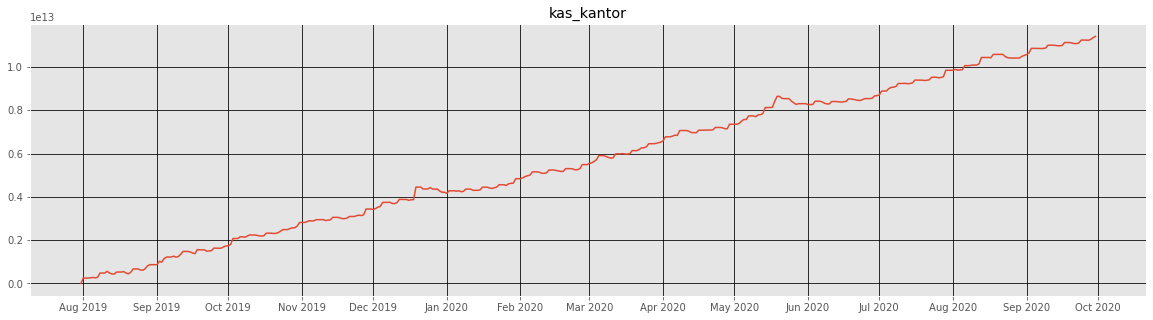

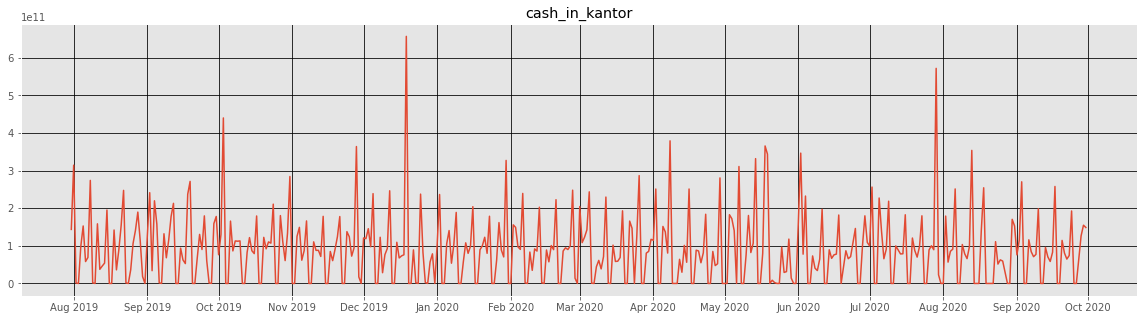

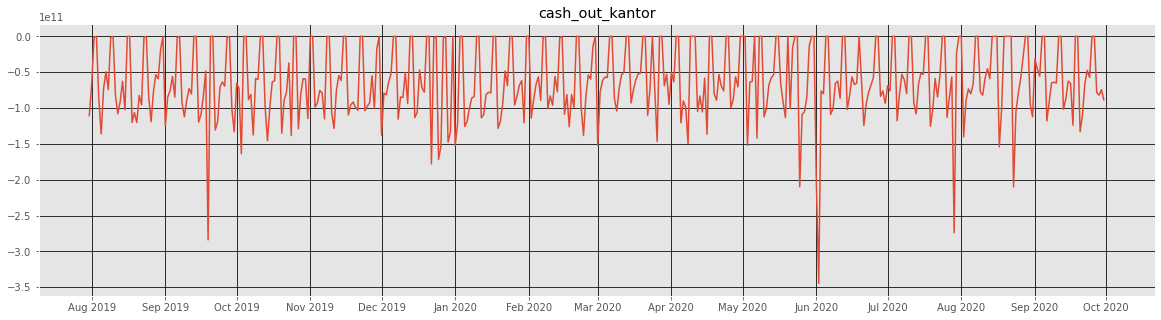

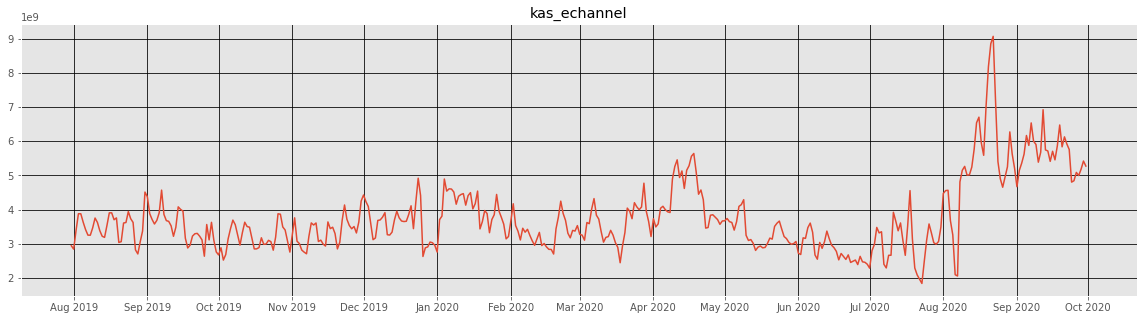

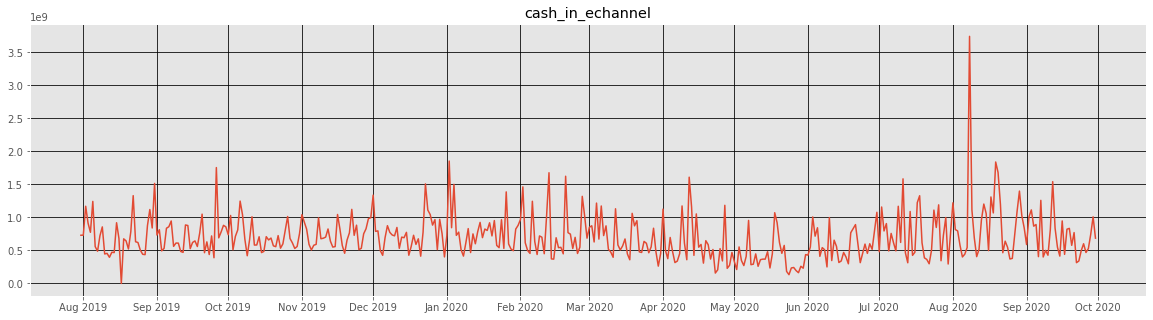

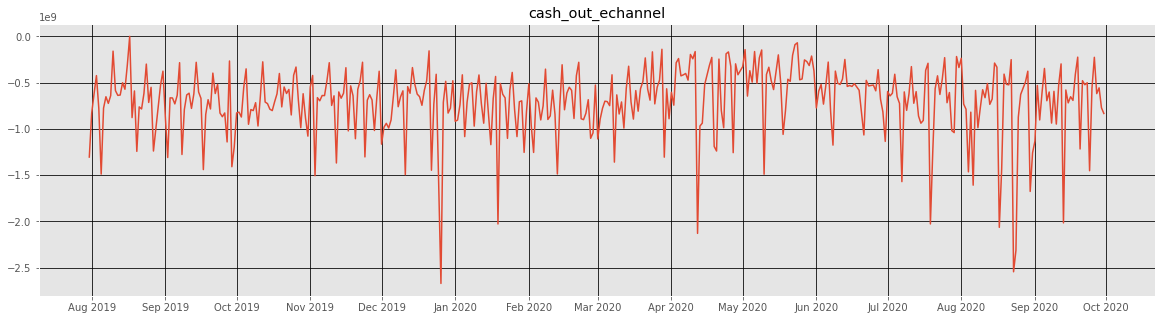

In [4]:
import matplotlib.dates as mdates

important_cols = ['kas_kantor', 'cash_in_kantor', 'cash_out_kantor',
                  'kas_echannel', 'cash_in_echannel', 'cash_out_echannel']

for col in important_cols:
    plt.figure(figsize=(20, 5))
    plt.plot(df[col])
    plt.grid(color='black')
    plt.title(col)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.show()

0.2196848107251261
0.23775623999710452


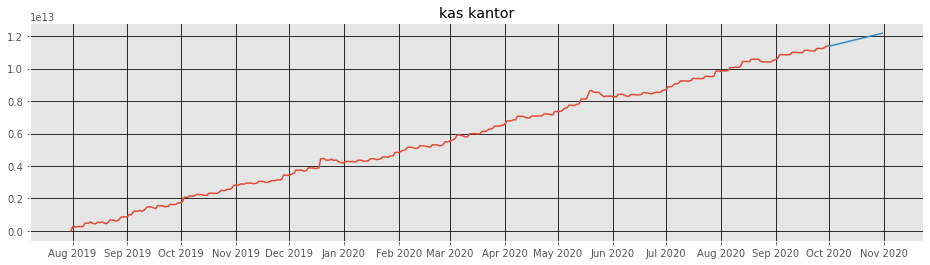

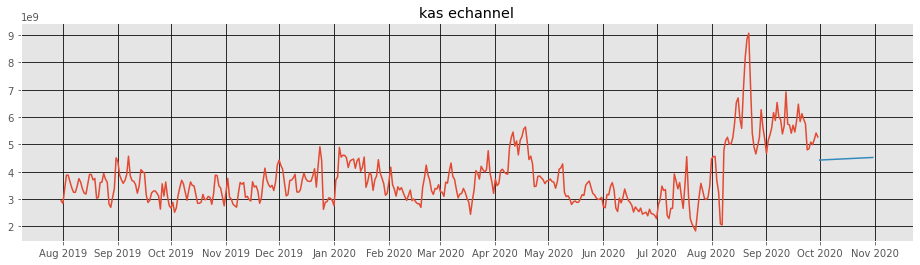

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error as msle

kas_kantor = df['kas_kantor']
kas_ec = df['kas_echannel']

X = np.arange(425).reshape(-1, 1)

lr_k = LinearRegression(fit_intercept=True)
lr_e = LinearRegression(fit_intercept=True)

lr_k.fit(X, kas_kantor)
lr_e.fit(X, kas_ec)

x_pred = np.arange(425, 425 + 31).reshape(-1, 1)
yk_pred = lr_k.predict(x_pred)
ye_pred = lr_e.predict(x_pred)

print(np.sqrt(msle(kas_kantor, lr_k.predict(X))))
print(np.sqrt(msle(kas_ec, lr_e.predict(X))))

pred_date_range = pd.date_range('2020-10-01', '2020-10-31')
yk_pred = pd.Series(yk_pred, index=pred_date_range)
ye_pred = pd.Series(ye_pred, index=pred_date_range)

plt.figure(figsize=(16, 4))
plt.plot(kas_kantor)
plt.plot(yk_pred)
plt.grid(color='black')
plt.title('kas kantor')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(kas_ec)
plt.plot(ye_pred)
plt.grid(color='black')
plt.title('kas echannel')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()

submission = pd.read_csv('../input/bri-data-hackathon-cr-optimization/sample_submission.csv')
submission.iloc[:31, 1] = yk_pred.values
submission.iloc[31:, 1] = ye_pred.values
submission.to_csv('submission.csv', index=False)